In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Φόρτωση και προεπεξεργασία των δεδομένων
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Κατασκευή του μοντέλου CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Σύνταξη του μοντέλου
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])

# Εκπαίδευση του μοντέλου
history = model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test), verbose=1)

# Αξιολόγηση της απόδοσης του μοντέλου στο σύνολο δοκιμής
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.8896 - loss: 0.3554 - val_accuracy: 0.9852 - val_loss: 0.0439
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9802 - loss: 0.0659 - val_accuracy: 0.9878 - val_loss: 0.0381
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9854 - loss: 0.0466 - val_accuracy: 0.9889 - val_loss: 0.0354
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9904 - loss: 0.0302 - val_accuracy: 0.9911 - val_loss: 0.0314
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9906 - val_loss: 0.0339
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9914 - val_loss: 0.0305
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9915 - val_loss: 0.0313
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 

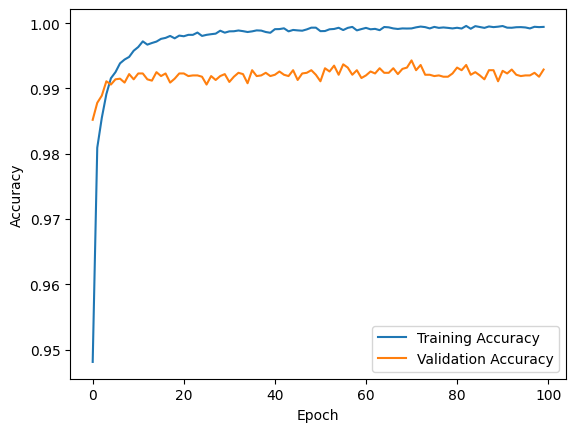

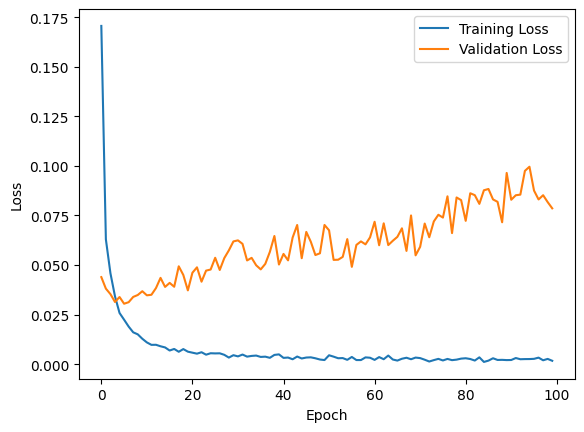

In [4]:
# Σχεδίαση της εξέλιξης της ακρίβειας και της απώλειας κατά τη διάρκεια της εκπαίδευσης
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()